In [1]:
from GCBC import *
import numpy as np

/Users/random/opt/anaconda3/envs/10703-hw/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


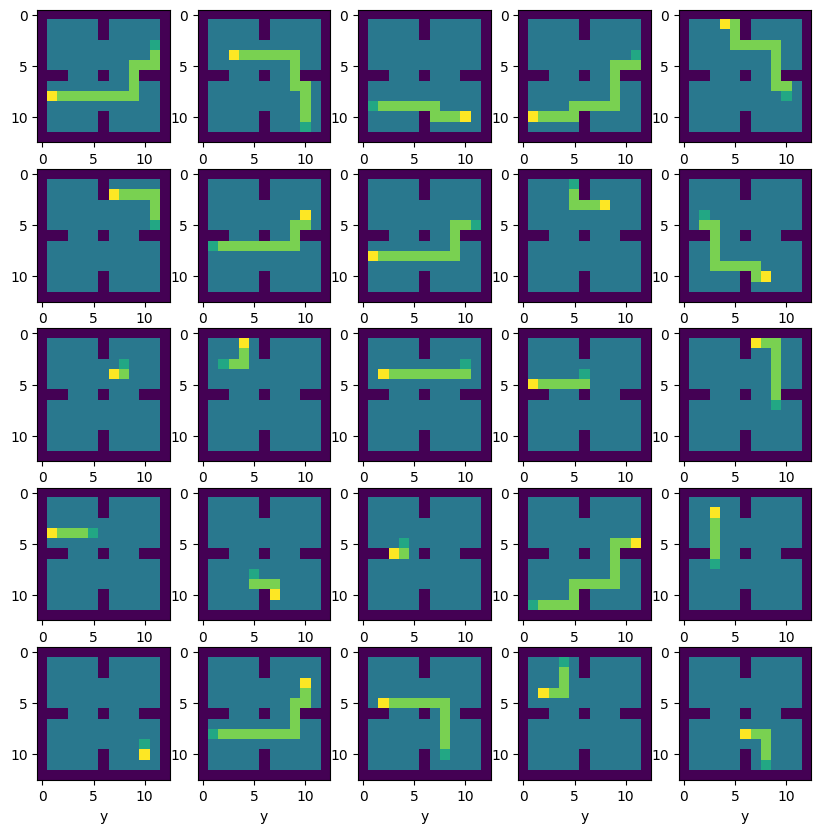

In [2]:
l, T = 5, 30
env = FourRooms(l, T)
env.reset()

# # test shortest traj
# print("env action space: ", env.action_space)
# print("env map: ", env.map)
# env.s = np.array([1, 1], dtype=int)
# env.g = np.array([0, 8], dtype=int)
# print("env sample goal", env.g)
# print("env sample state", env.s)
# test shortest traj
# shortest_traj, shortest_actions = compute_shortest_path(env)
# print("shortest_traj: ", shortest_traj)
# print("shortest_actions: ", shortest_actions)
expert_trajs, expert_actions =  shortest_path_expert(env, render=True);


In [3]:
gcbc = GCBC(expert_trajs=expert_trajs, expert_actions=expert_actions, env=env)
gcbc.generate_behavior_cloning_data()
batch_size = 256
dataset = GCDataset(gcbc._train_states, gcbc._train_actions)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=gcbc.num_workers)
gcbc.train(dataloader, num_epochs=20)


(0.691237723827362, 0.7668536325295766)

In [4]:

# run_GCBC(expert_trajs, expert_actions, env, num_seeds=2, num_iters=1, num_epochs=1, mode="vanilla", batch_size=2048, num_workers=1)
# run_GCBC(expert_trajs, expert_actions, env, num_seeds=5, num_iters=150, num_epochs=20, mode="vanilla", batch_size=2048, num_workers=1)


**************************************************
seed: 0
total train samples: 7619


100%|██████████| 150/150 [00:56<00:00,  2.65it/s]


**************************************************
seed: 1
total train samples: 7572


100%|██████████| 150/150 [00:39<00:00,  3.76it/s]


**************************************************
seed: 2
total train samples: 7549


100%|██████████| 150/150 [00:45<00:00,  3.27it/s]


**************************************************
seed: 3
total train samples: 7675


100%|██████████| 150/150 [00:43<00:00,  3.46it/s]


**************************************************
seed: 4
total train samples: 7474


100%|██████████| 150/150 [00:48<00:00,  3.07it/s]


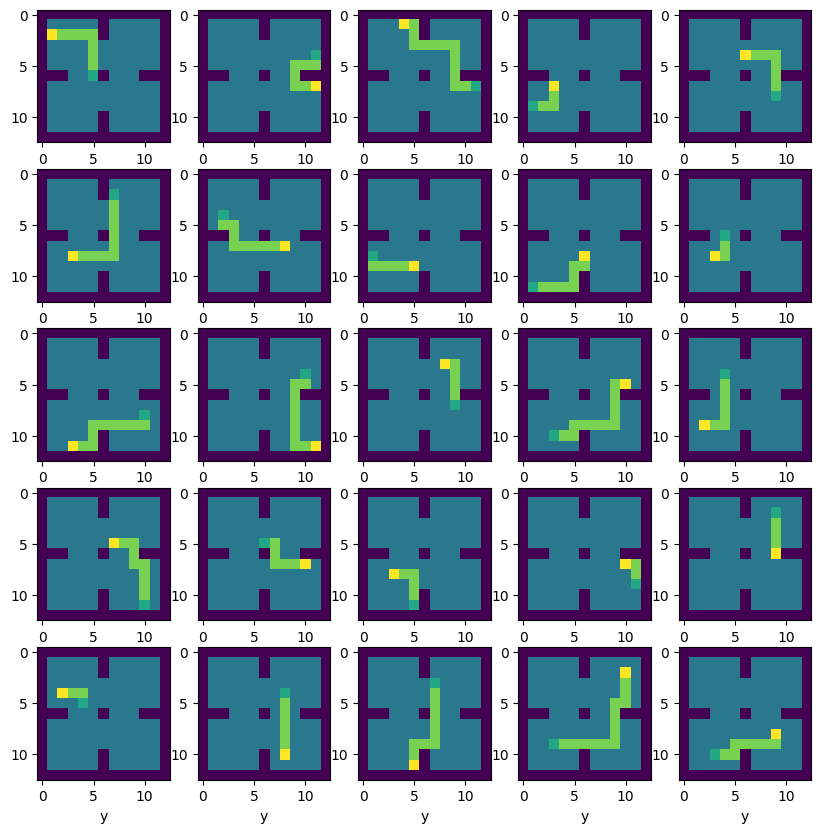

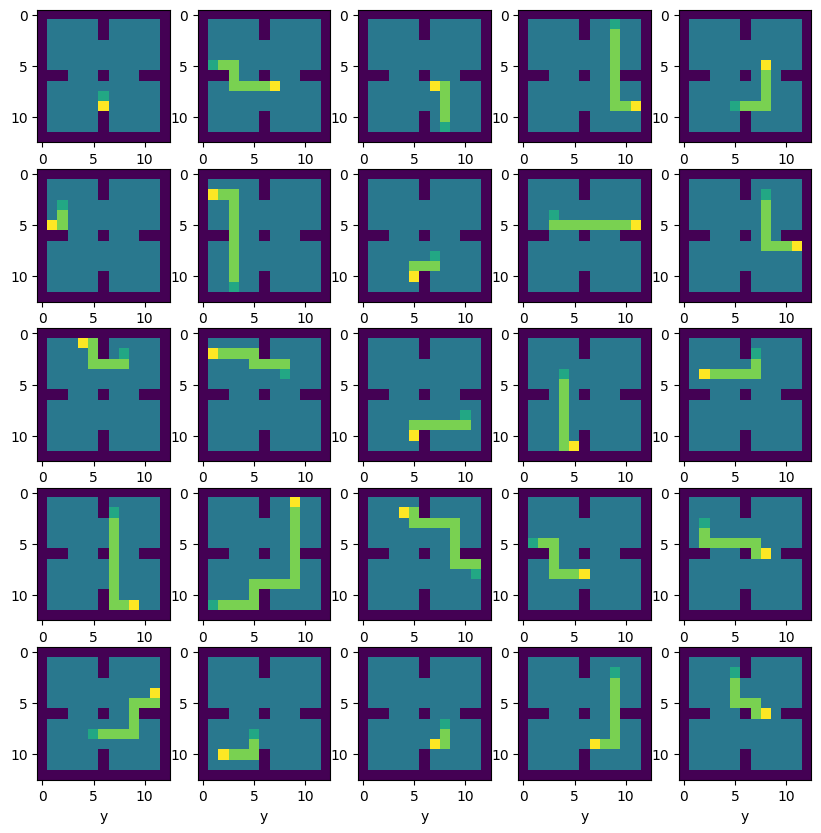

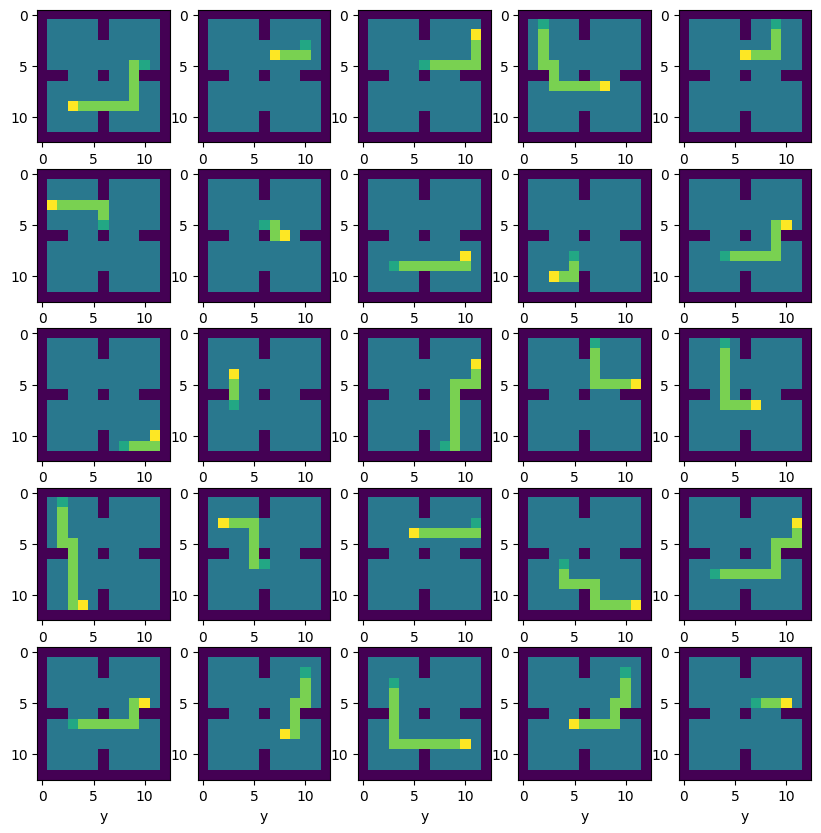

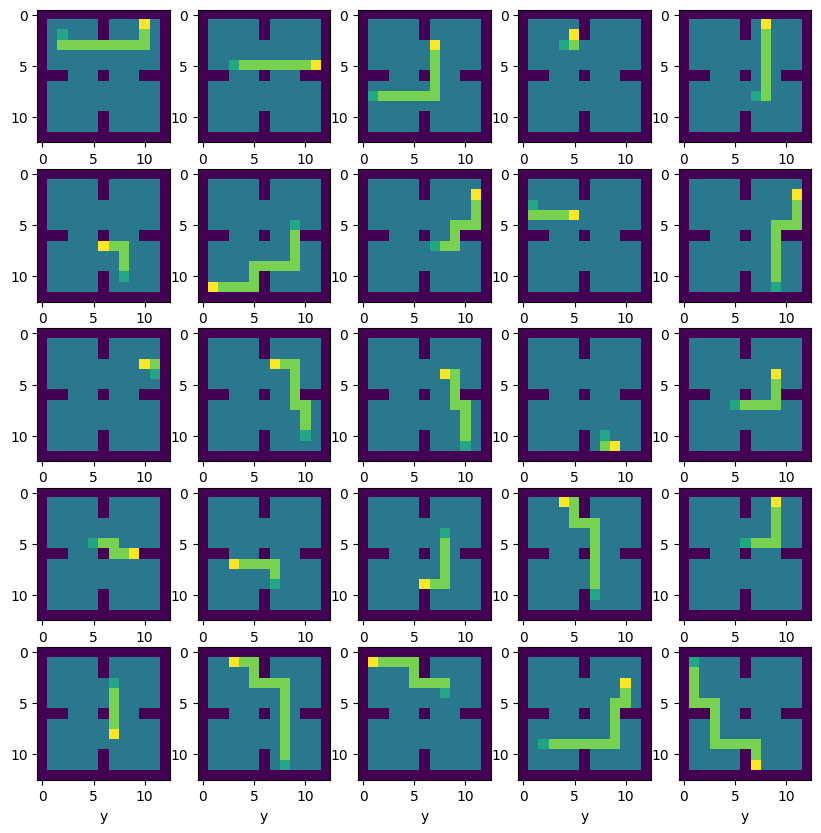

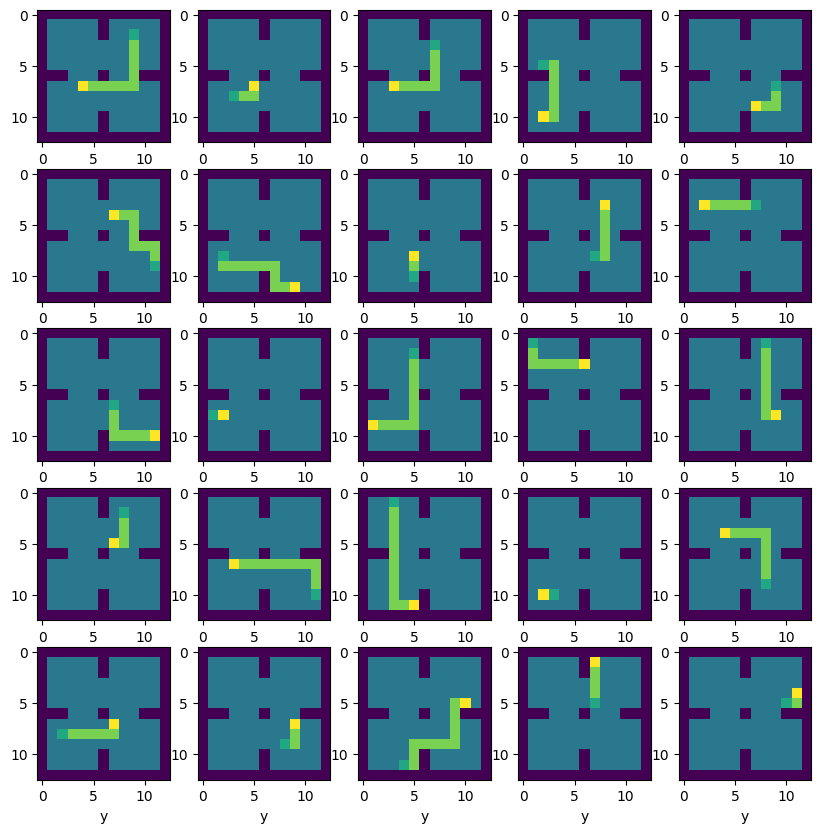

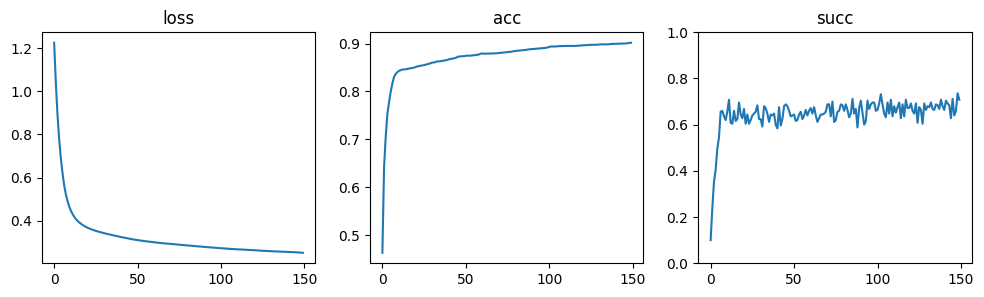

In [5]:
run_GCBC(env, num_seeds=5, num_iters=150, num_epochs=20, mode="vanilla", batch_size=2048, num_workers=1)

## Relabel

In [6]:
run_GCBC(env, num_seeds=5, num_iters=150, num_epochs=20, mode="relabel", batch_size=2048, num_workers=1)

**************************************************
seed: 0
total train samples: 39950


100%|██████████| 150/150 [03:03<00:00,  1.22s/it]


**************************************************
seed: 1
total train samples: 37573


100%|██████████| 150/150 [02:29<00:00,  1.00it/s]


**************************************************
seed: 2
total train samples: 39280


 77%|███████▋  | 115/150 [02:35<00:50,  1.44s/it]

In [ ]:
run_GCBC(env, num_seeds=5, num_iters=50, num_epochs=20, mode="random_vanilla", batch_size=2048, num_workers=1)

In [ ]:
run_GCBC(env, num_seeds=5, num_iters=50, num_epochs=20, mode="random_relabel", batch_size=2048, num_workers=1)